In [19]:
import json
import os

import matplotlib.pyplot as plt
from pathlib import Path

sim_dir = Path("../../../../../results/simulation")
hw_dir = Path("../../../../../results/hardware")

In [20]:
def load_runs(directory, label_prefix):
    runs = []
    for file in sorted(directory.glob("*.json")):
        with open(file) as f:
            data = json.load(f)["raw_ir_data"]
        runs.append((label_prefix + " " + file.stem, data))
    return runs

sim_runs = load_runs(sim_dir, "Sim")
hw_runs = load_runs(hw_dir, "HW")

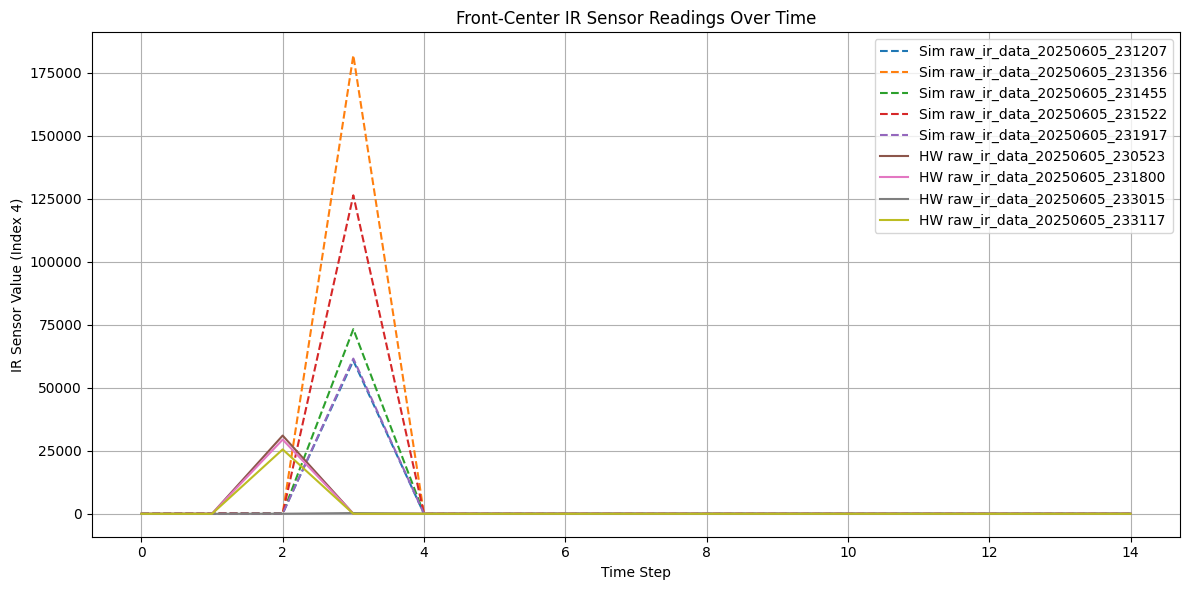

In [21]:
plt.figure(figsize=(12, 6))

for label, run in sim_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label, linestyle="--")

for label, run in hw_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label)

plt.title("Front-Center IR Sensor Readings Over Time")
plt.xlabel("Time Step")
plt.ylabel("IR Sensor Value (Index 4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()